- This notebook is for training the model for predicting the column "Appliances" while it is considered as numerical data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random as rn
import tensorflow as tf

from keras import backend as K
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import load_model
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
# prepare the functions for evaluating the model
def mse(ar1, ar2):
    return ((ar1 - ar2) ** 2).mean()

def rmse(ar1, ar2):
    return np.sqrt(mse(ar1, ar2))

In [3]:
# make the results reproducible
os.environ["PYTHONHASHSEED"] = '0'
np.random.seed(1)
rn.seed(2)
tf.set_random_seed(3)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [4]:
# loading and preprocessing data
energydata_complete = pd.read_csv("energydata_complete.csv").iloc[:, 1:]

energydata_complete = energydata_complete.drop(['lights'], axis=1)

sc = MinMaxScaler(feature_range = (0, 1))

values_scaled = pd.DataFrame(sc.fit_transform(energydata_complete))

d:\programfilesnospace\miniconda3\envs\py365-tfgpu\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
# separate the data into training set and testing set
X_train_scaled = values_scaled.iloc[:round(np.shape(values_scaled)[0] * 0.8), 1:]
Y_train_scaled = values_scaled.iloc[:round(np.shape(values_scaled)[0] * 0.8), 0]

X_test_scaled = values_scaled.iloc[round(np.shape(values_scaled)[0] * 0.8):, 1:]
Y_test_scaled = values_scaled.iloc[round(np.shape(values_scaled)[0] * 0.8):, 0]
Y_test = energydata_complete.iloc[round(np.shape(energydata_complete)[0] * 0.8):, 0].values

X_train_scaled = np.reshape(X_train_scaled.values, (X_train_scaled.values.shape[0], X_train_scaled.values.shape[1], 1))
X_test_scaled = np.reshape(X_test_scaled.values, (X_test_scaled.values.shape[0], X_test_scaled.values.shape[1], 1))

In [6]:
# Initialising the RNN
layers = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
layers.add(LSTM(units = 16, return_sequences = True, input_shape = (X_train_scaled.shape[1], 1)))
layers.add(Dropout(0.2))

layers.add(Flatten())

# Adding the output layer
layers.add(Dense(1))

layers.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/100
15788/15788 [==============================] - 3s 160us/step - loss: 0.0124
Epoch 2/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0106
Epoch 3/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0102
Epoch 4/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0099
Epoch 5/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0097
Epoch 6/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0097
Epoch 7/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0095
Epoch 8/100
15788/15788 [==============================] - 1s 89us/step - loss: 0.0095
Epoch 9/100
15788/15788 [==============================] - 1s 89us/step - loss: 0.0094
Epoch 10/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0094
Epoch 11/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0093
Epoch 12/100
15788/15788 [==============

Epoch 94/100
15788/15788 [==============================] - 2s 102us/step - loss: 0.0085
Epoch 95/100
15788/15788 [==============================] - 1s 89us/step - loss: 0.0085
Epoch 96/100
15788/15788 [==============================] - 2s 100us/step - loss: 0.0085
Epoch 97/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0084
Epoch 98/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0085
Epoch 99/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0084
Epoch 100/100
15788/15788 [==============================] - 1s 93us/step - loss: 0.0084
The mean squared error is: 7670.326751774344


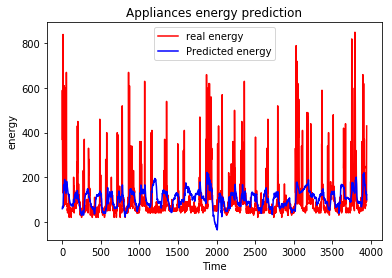

In [7]:
# all the following code will be executed manually for every iteration
layers.fit(X_train_scaled, Y_train_scaled, epochs = 100, batch_size = 512)

# layers.save('layers1_2.h5')  # creates a HDF5 file 'my_model.h5'
# layers = load_model('layers1_2.h5')

predicted_energy = layers.predict(X_test_scaled)

predicted_inversed = sc.inverse_transform(np.hstack((predicted_energy, np.zeros((predicted_energy.shape[0], np.shape(energydata_complete)[1] - 1)))))[:, 0]
predicted_mse = mse(predicted_inversed, Y_test)
print("The mean squared error is: {0}".format(predicted_mse))

plt.plot(Y_test, color = 'red', label = 'real energy')
plt.plot(predicted_inversed, color = 'blue', label = 'Predicted energy')
plt.title('Appliances energy prediction')
plt.xlabel('Time')
plt.ylabel('energy')
plt.legend()
plt.show()

Epoch 1/100
15788/15788 [==============================] - 2s 114us/step - loss: 0.0084
Epoch 2/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0085
Epoch 3/100
15788/15788 [==============================] - 1s 94us/step - loss: 0.0084
Epoch 4/100
15788/15788 [==============================] - 2s 120us/step - loss: 0.0085
Epoch 5/100
15788/15788 [==============================] - 2s 97us/step - loss: 0.0084
Epoch 6/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0084
Epoch 7/100
15788/15788 [==============================] - 2s 97us/step - loss: 0.0084
Epoch 8/100
15788/15788 [==============================] - 2s 105us/step - loss: 0.0085
Epoch 9/100
15788/15788 [==============================] - 2s 95us/step - loss: 0.0085
Epoch 10/100
15788/15788 [==============================] - 1s 89us/step - loss: 0.0084
Epoch 11/100
15788/15788 [==============================] - 1s 92us/step - loss: 0.0085
Epoch 12/100
15788/15788 [============

Epoch 94/100
15788/15788 [==============================] - 1s 88us/step - loss: 0.0082
Epoch 95/100
15788/15788 [==============================] - 1s 89us/step - loss: 0.0082
Epoch 96/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 97/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 98/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 99/100
15788/15788 [==============================] - 1s 89us/step - loss: 0.0082
Epoch 100/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
The mean squared error is: 7629.418491753409


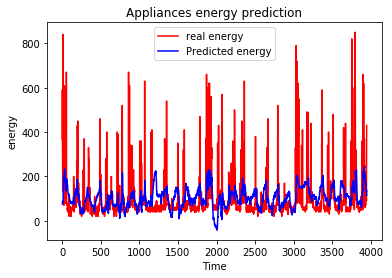

In [8]:
# all the following code will be executed manually for every iteration
layers.fit(X_train_scaled, Y_train_scaled, epochs = 100, batch_size = 512)

# layers.save('layers1_2.h5')  # creates a HDF5 file 'my_model.h5'
# layers = load_model('layers1_2.h5')

predicted_energy = layers.predict(X_test_scaled)

predicted_inversed = sc.inverse_transform(np.hstack((predicted_energy, np.zeros((predicted_energy.shape[0], np.shape(energydata_complete)[1] - 1)))))[:, 0]
predicted_mse = mse(predicted_inversed, Y_test)
print("The mean squared error is: {0}".format(predicted_mse))

plt.plot(Y_test, color = 'red', label = 'real energy')
plt.plot(predicted_inversed, color = 'blue', label = 'Predicted energy')
plt.title('Appliances energy prediction')
plt.xlabel('Time')
plt.ylabel('energy')
plt.legend()
plt.show()

Epoch 1/100
15788/15788 [==============================] - 2s 115us/step - loss: 0.0082
Epoch 2/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 3/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 4/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 5/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 6/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 7/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 8/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 9/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 10/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 11/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0082
Epoch 12/100
15788/15788 [==============

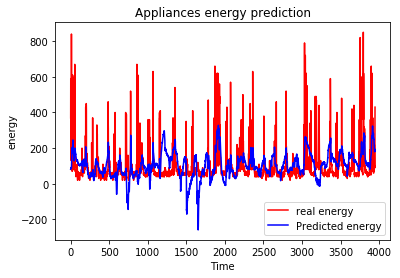

In [9]:
# all the following code will be executed manually for every iteration
layers.fit(X_train_scaled, Y_train_scaled, epochs = 100, batch_size = 512)

# layers.save('layers1_2.h5')  # creates a HDF5 file 'my_model.h5'
# layers = load_model('layers1_2.h5')

predicted_energy = layers.predict(X_test_scaled)

predicted_inversed = sc.inverse_transform(np.hstack((predicted_energy, np.zeros((predicted_energy.shape[0], np.shape(energydata_complete)[1] - 1)))))[:, 0]
predicted_mse = mse(predicted_inversed, Y_test)
print("The mean squared error is: {0}".format(predicted_mse))

plt.plot(Y_test, color = 'red', label = 'real energy')
plt.plot(predicted_inversed, color = 'blue', label = 'Predicted energy')
plt.title('Appliances energy prediction')
plt.xlabel('Time')
plt.ylabel('energy')
plt.legend()
plt.show()

Epoch 1/100
15788/15788 [==============================] - 2s 114us/step - loss: 0.0079
Epoch 2/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0079
Epoch 3/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0079
Epoch 4/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0079
Epoch 5/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0079
Epoch 6/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0079
Epoch 7/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0078
Epoch 8/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0079
Epoch 9/100
15788/15788 [==============================] - 1s 91us/step - loss: 0.0079
Epoch 10/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0079
Epoch 11/100
15788/15788 [==============================] - 1s 90us/step - loss: 0.0078
Epoch 12/100
15788/15788 [==============

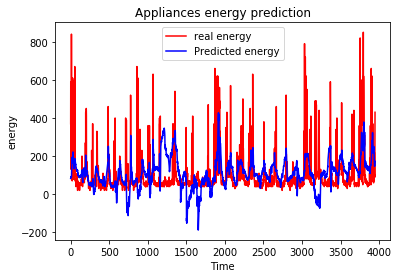

In [10]:
# all the following code will be executed manually for every iteration
layers.fit(X_train_scaled, Y_train_scaled, epochs = 100, batch_size = 512)

# layers.save('layers1_2.h5')  # creates a HDF5 file 'my_model.h5'
# layers = load_model('layers1_2.h5')

predicted_energy = layers.predict(X_test_scaled)

predicted_inversed = sc.inverse_transform(np.hstack((predicted_energy, np.zeros((predicted_energy.shape[0], np.shape(energydata_complete)[1] - 1)))))[:, 0]
predicted_mse = mse(predicted_inversed, Y_test)
print("The mean squared error is: {0}".format(predicted_mse))

plt.plot(Y_test, color = 'red', label = 'real energy')
plt.plot(predicted_inversed, color = 'blue', label = 'Predicted energy')
plt.title('Appliances energy prediction')
plt.xlabel('Time')
plt.ylabel('energy')
plt.legend()
plt.show()

- From the results we can see that, at the end of the 2nd iteration, the mean squared error reaches 7629, much lower than the previous results, then it starts to overfit. Considering the range of this variable, prediction with root mean squared error below 90 is acceptable. For many values in the graph, our prediction only catches the trend, there are large gaps between the magnitudes. If we need to get a more precise model, more layer may be needed for extracting more deeper information. That is time consuming and we are planning to accomplish it in the future when we become more experienced.